<a href="https://colab.research.google.com/github/JomanaAshraf/Standard-Card-Deck-Detection/blob/main/Cards_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Standard Card Deck Detection**

The task is to detect the standard 52-cards deck which have 52 classes with different numbers and different types. The classes names which used for this detection are: names: ['10C', '10D', '10H', '10S', '2C', '2D', '2H', '2S', '3C', '3D', '3H', '3S','4C', '4D', '4H', '4S', '5C', '5D', '5H', '5S', '6C', '6D', '6H', '6S', '7C', '7D', '7H', '7S', '8C', '8D', '8H', '8S', '9C', '9D', '9H','9S','AC', 'AD', 'AH', 'AS', 'JC', 'JD', 'JH', 'JS', 'KC', 'KD', 'KH', 'KS', 'QC', 'QD', 'QH', 'QS'] where "S" refer to "Spade", "C" is "Club", "D" is "Diamond", and "H" is "Heart". The object detection is done by using YOLOV7 architecture.

# 0. Import libraries

Import all libraries/packages that will help t fulfill the task.

In [ ]:
import os
import cv2
from matplotlib import pyplot as plt

In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Process done to prepare the data

100 images are annotated by using Roboflow and then splitted it to 80 images for training and 20 for validation. Then the YOLOV7 package is installed and prepare it by adding the dataset to it and modify the configuration file to contain the same number of classes that this task had which changing the **nc** from 80 to 52 classes. Then a yaml file is created that include the path to the train and validation data, the number of classes, and the classes used. Then, this folder is uploaded to the drive to excute the python code of the train and detect to perform the object detection task.

# 1. Install the dependencies




In [ ]:
!pip install -r /content/drive/MyDrive/yolov7/requirements.txt
!pip install -r /content/drive/MyDrive/yolov7/requirements_gpu.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 34.5 MB/s 
Looking in indexes: https://download.pytorch.org/whl/cu113
     |████████████████▎               | 834.1 MB 1.3 MB/s eta 0:10:20tcmalloc: large alloc 1147494400 bytes == 0x3909c000 @  0x7fc947dbc615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc 0x58fd37 0x50ca37 0x5b4ee6 0x58ff2e
     |████████████████████▋           | 1055.7 MB 1.3 MB/s eta 0:07:22tcmalloc: large alloc 1434370048 bytes == 0x7d6f2000 @  0x7fc947dbc615 0x58ead6 0x4f355e 0x4d222f 0x51041f 0x5b4ee6 0x58ff2e 0x510325 0x5b4ee6 0x58ff2e 0x50d482 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4d00fb 0x50cb8d 0x4bac0a 0x538a76 0x590ae5 0x510280 0x5b4ee6 0x58ff2e 0x50d482 0x5b4ee6 0x58ff2e 0x50c4fc

# 2. Show some of the annotated data

In [ ]:
%cd /content/drive/MyDrive/draw-YOLO-box
!python draw_box.py

/content/drive/MyDrive/draw-YOLO-box
.DS_Store
Box number: 0 Image number: 1
000056694_jpg.rf.52e6f74027c92feb0af134025af1d476
Box number: 4 Image number: 2
005057830_jpg.rf.26dd4ea8fc9f4c9b30a829e575998e81
Box number: 8 Image number: 3
004452289_jpg.rf.2097cb68378d9af0a371239d30c1a22f
Box number: 12 Image number: 4
004408303_jpg.rf.70456d24e652a24ba01d1cf0abcb9b7c
Box number: 16 Image number: 5
004293092_jpg.rf.83064ff2e46277dff6e6e1eacc5584ab
Box number: 20 Image number: 6
004134381_jpg.rf.ae0740de8a8728b154a37a50bd5a3f21
Box number: 24 Image number: 7
003362608_jpg.rf.df0a08fb70088706f2562e8ca9ed8769
Box number: 28 Image number: 8
004152855_jpg.rf.43422b4dd8893d6e6ed7d1c83ad1cbdd
Box number: 32 Image number: 9
003527171_jpg.rf.d2d6a9e7be42a31b005d23651eb2226d
Box number: 36 Image number: 10
003127142_jpg.rf.c923225b7de8d2ef91beeb565c61cb88
Box number: 40 Image number: 11
003123257_jpg.rf.358b7dc76abaa6a56439314f1cba9919
Box number: 44 Image number: 12
002997165_jpg.rf.f3e22c61f4e5df

In [ ]:
import glob
i = 0
limit = 10000
for imageName in glob.glob('/content/drive/MyDrive/draw-YOLO-box/save_image/*.jpg'):
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
      i = i + 1


# 3. Train the dataset


In [ ]:
%cd /content/drive/MyDrive/yolov7/
!python train.py --workers 1 --device 0 --batch-size 16 --epochs 300 --img 640 640 --data /content/drive/MyDrive/yolov7/data/cards.yaml --cfg /content/drive/MyDrive/yolov7/cfg/training/yolov7.yaml --hyp data/hyp.scratch.custom.yaml --name custom_300 --weights yolov7.pt

[Errno 2] No such file or directory: 'drive/MyDrive/yolov7/'
/content/drive/MyDrive/yolov7
YOLOR 🚀 2022-10-7 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='/content/drive/MyDrive/yolov7/cfg/training/yolov7.yaml', data='/content/drive/MyDrive/yolov7/data/cards.yaml', device='0', entity=None, epochs=300, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='custom_300', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/custom_300', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=1, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/tr

# 4. Visualize the batches of the training

In [ ]:
import glob
i = 0
limit = 10000
for imageName in glob.glob('/content/drive/MyDrive/yolov7/runs/train/custom_300/*.jpg'):
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
      i = i + 1


# 5. Visualize the Loss and Accuracy

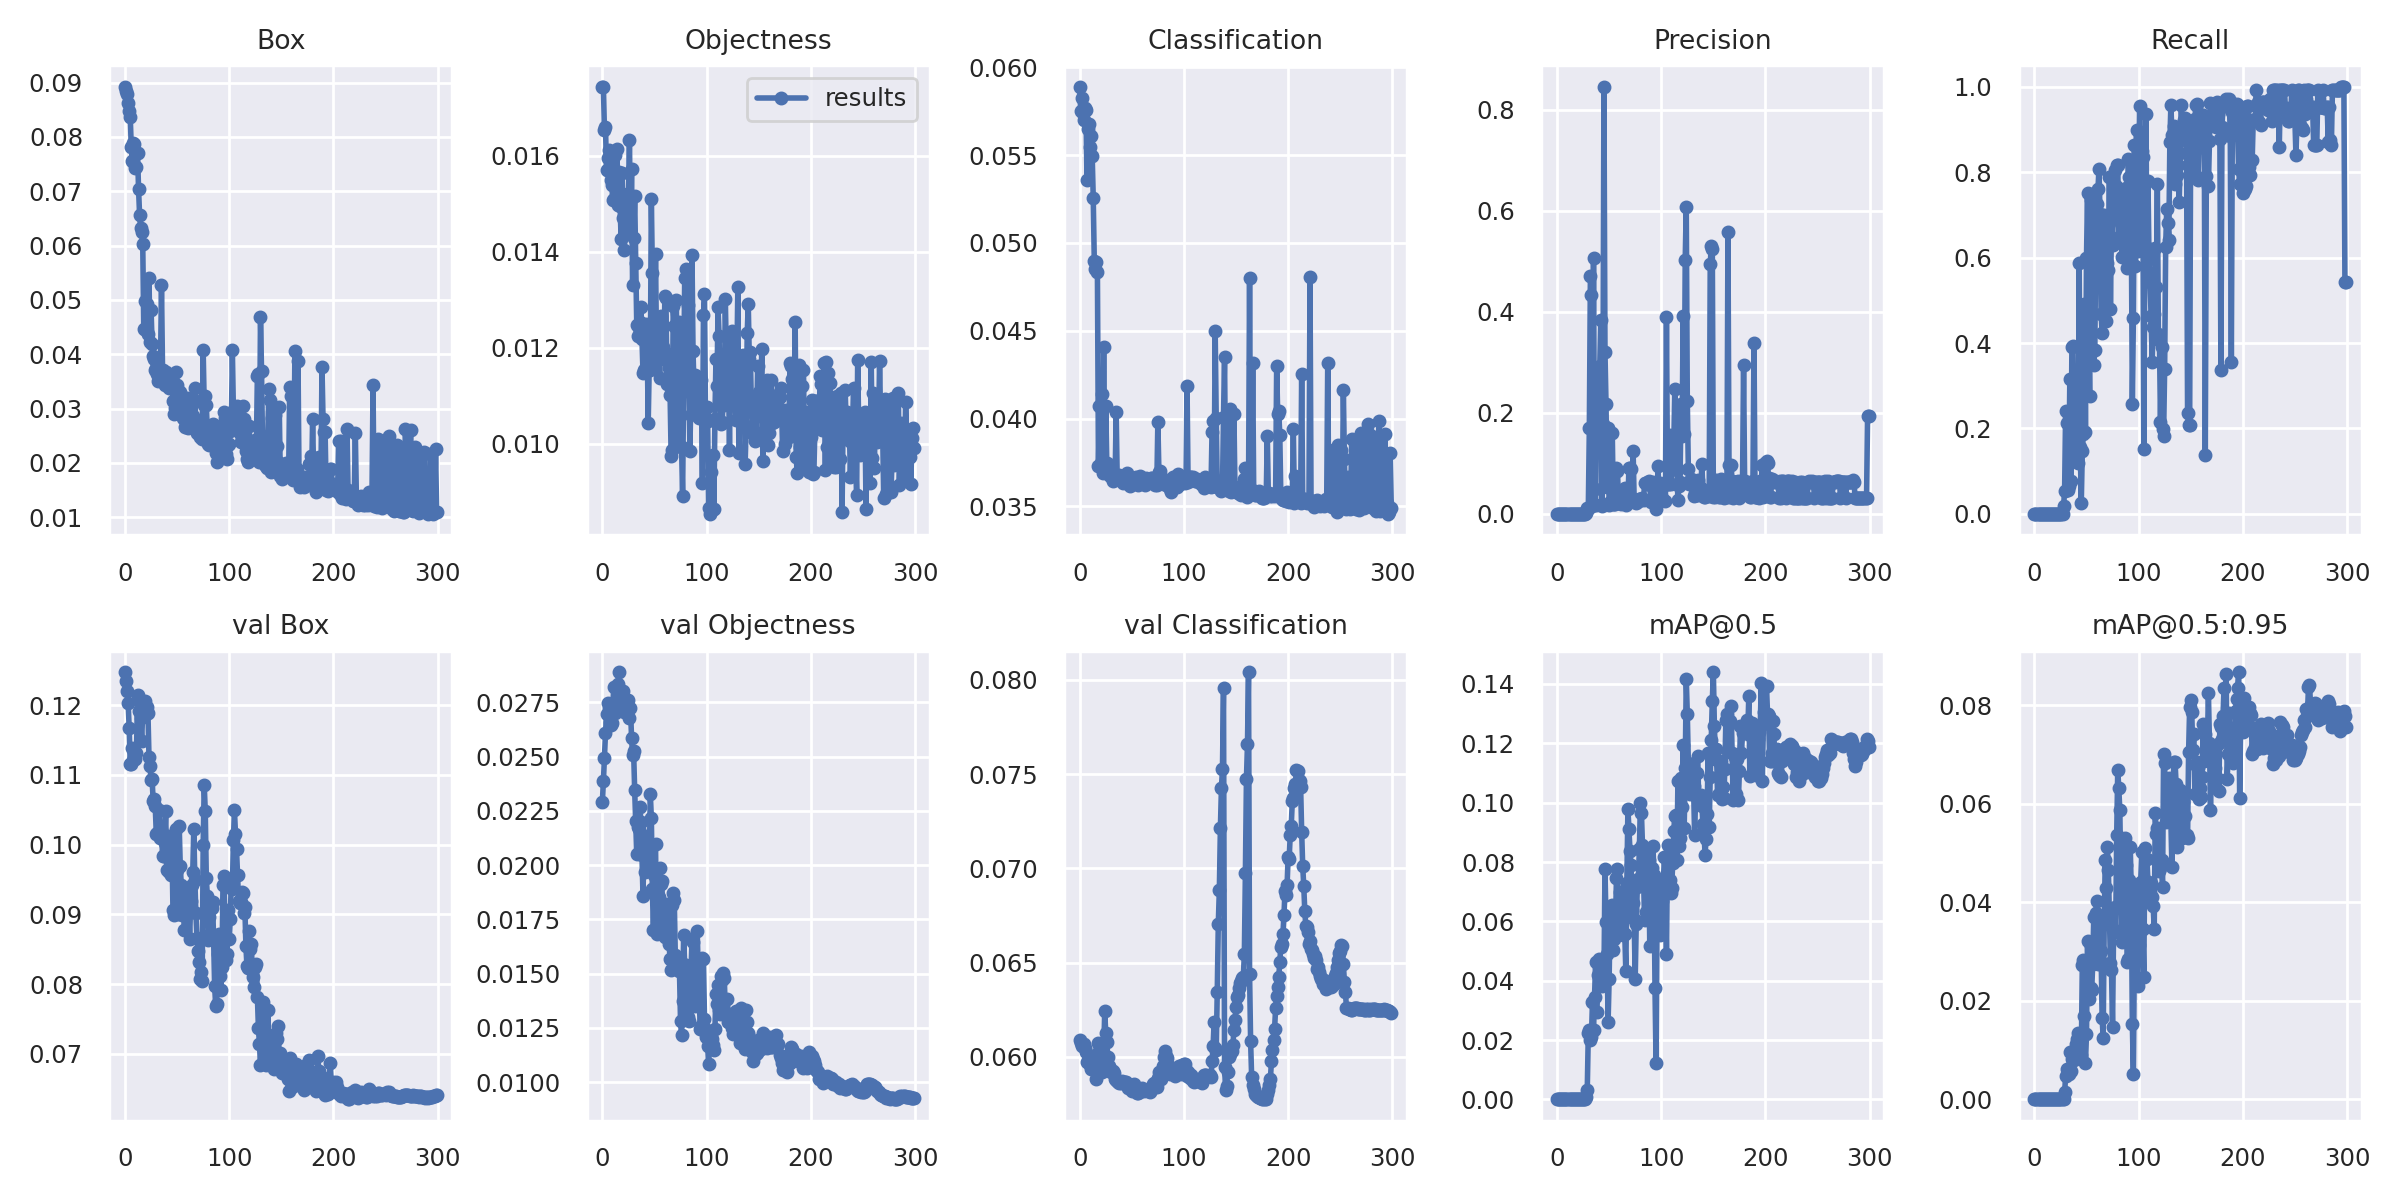

In [ ]:
Image(filename='/content/drive/MyDrive/yolov7/runs/train/custom_300/results.png', width=1000)

# 6. Detect the images in the validation dataset



```
# This is formatted as code
```



In [ ]:
# Run evaluation
!python detect.py --weights runs/train/custom_300/weights/best.pt --conf 0.02 --img-size 640 --source /content/drive/MyDrive/yolov7/data/valid/images --name 'exp_300_0.02'

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.02, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp_300_0.02', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7/data/valid/images', update=False, view_img=False, weights=['runs/train/custom_300/weights/best.pt'])
YOLOR 🚀 2022-10-7 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36756866 parameters, 6194944 gradients, 104.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_mo

# 7. Results of the detection

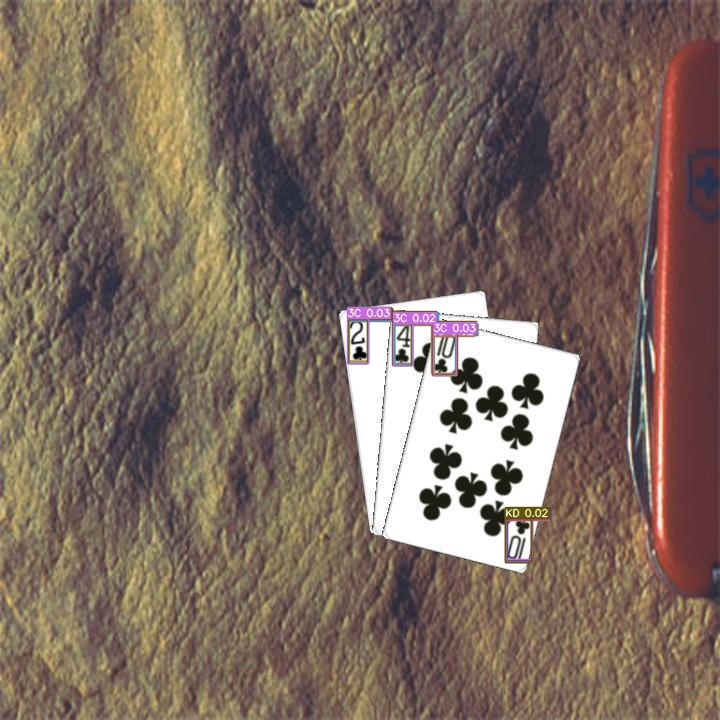

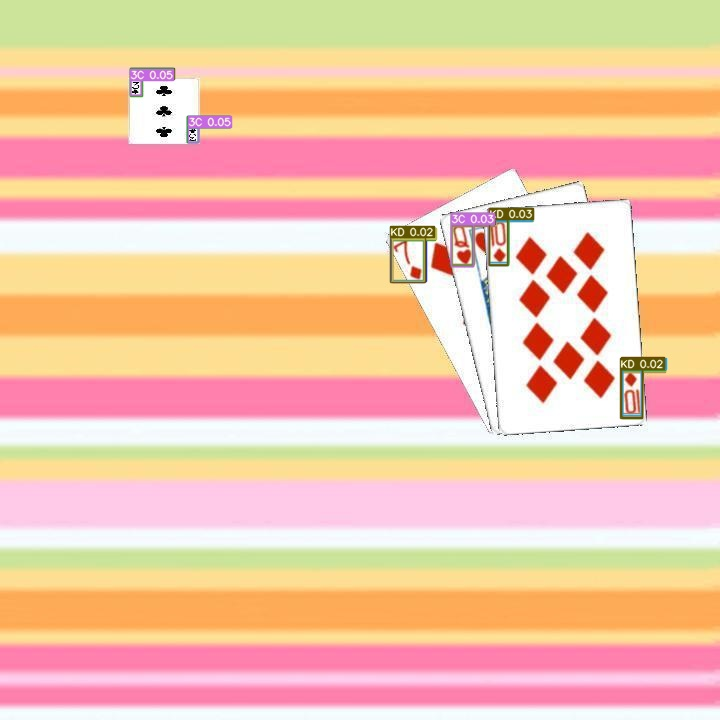

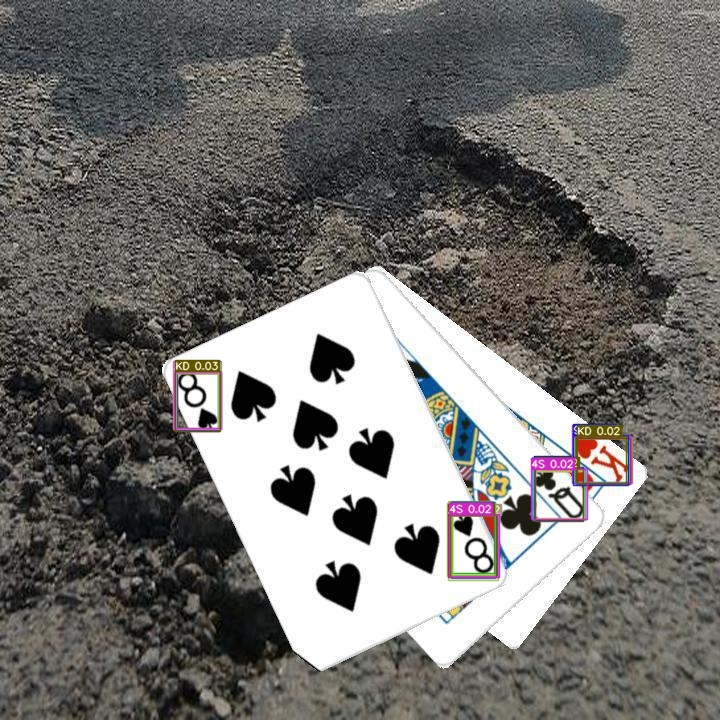

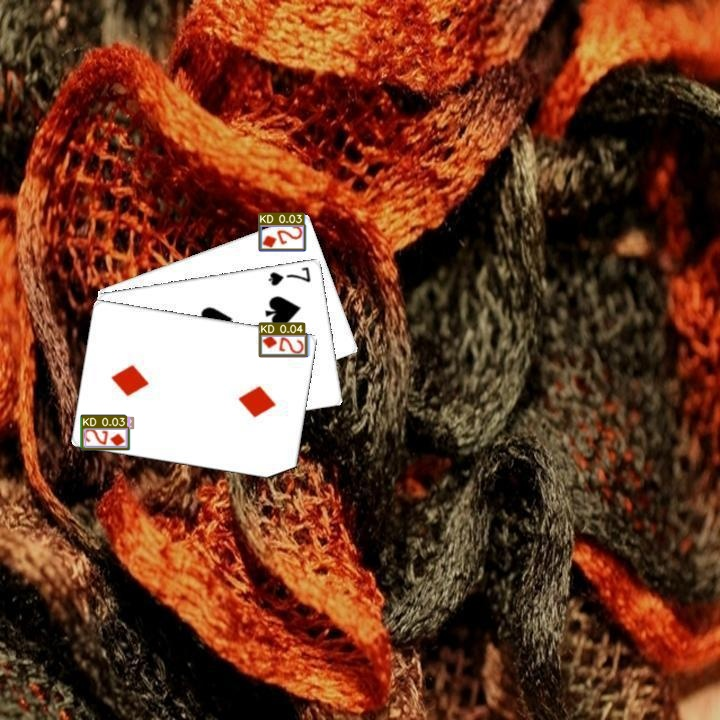

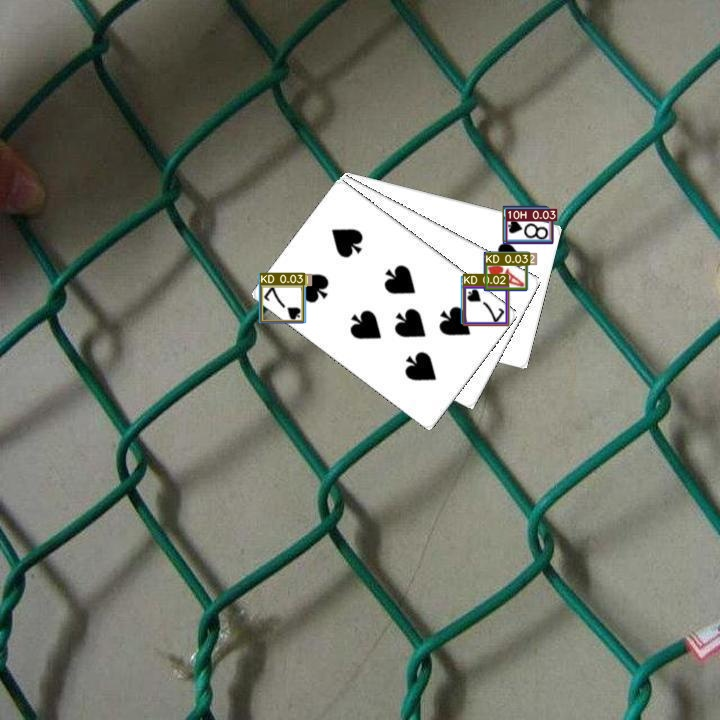

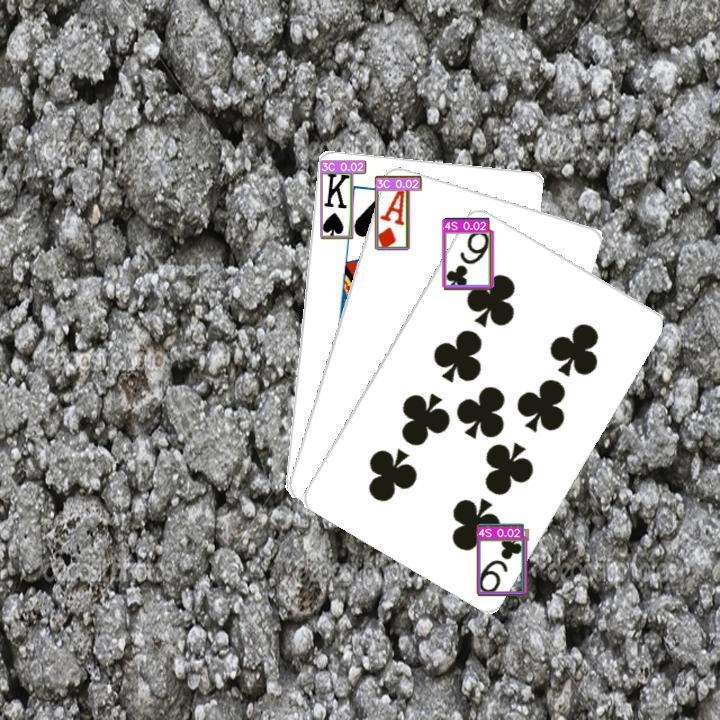

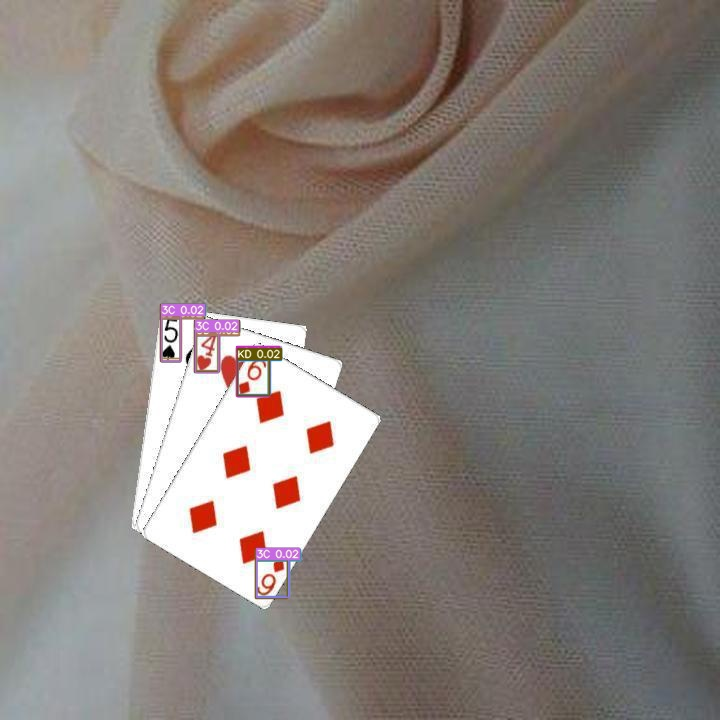

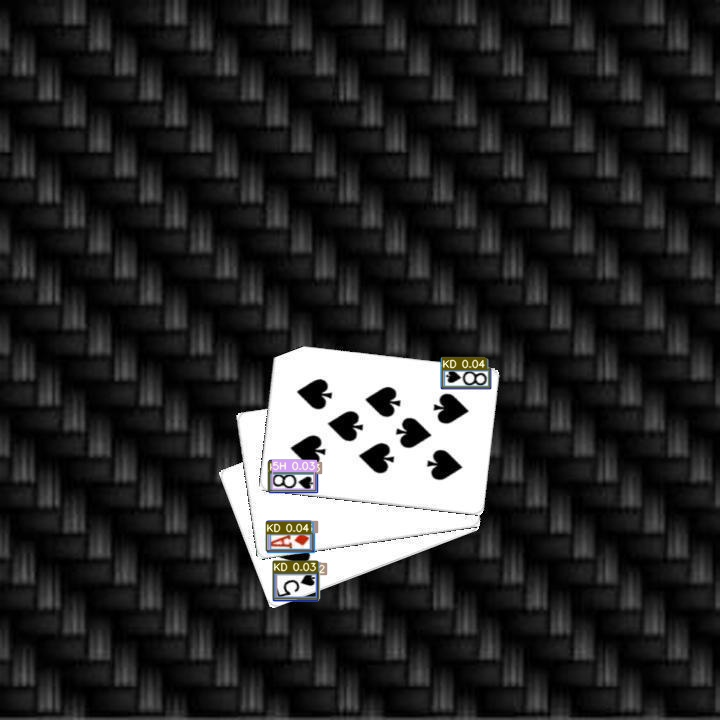

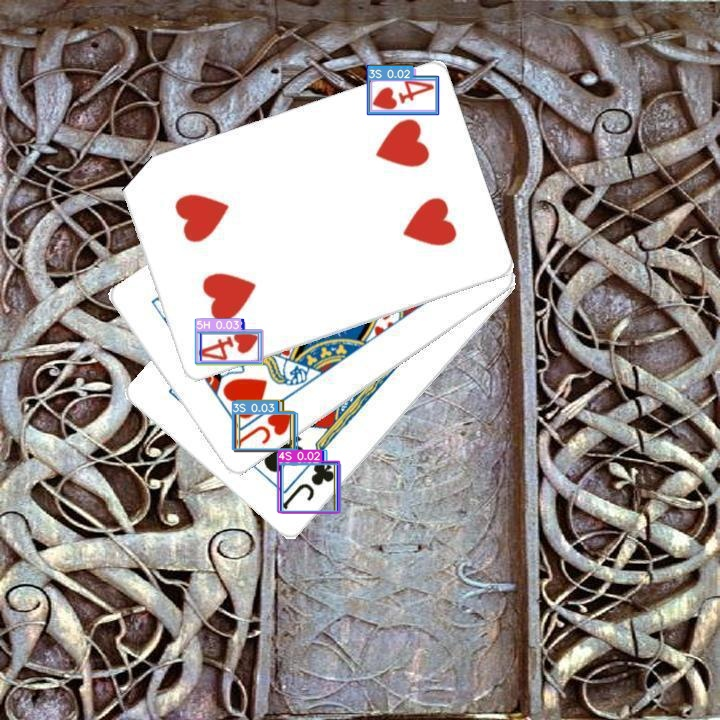

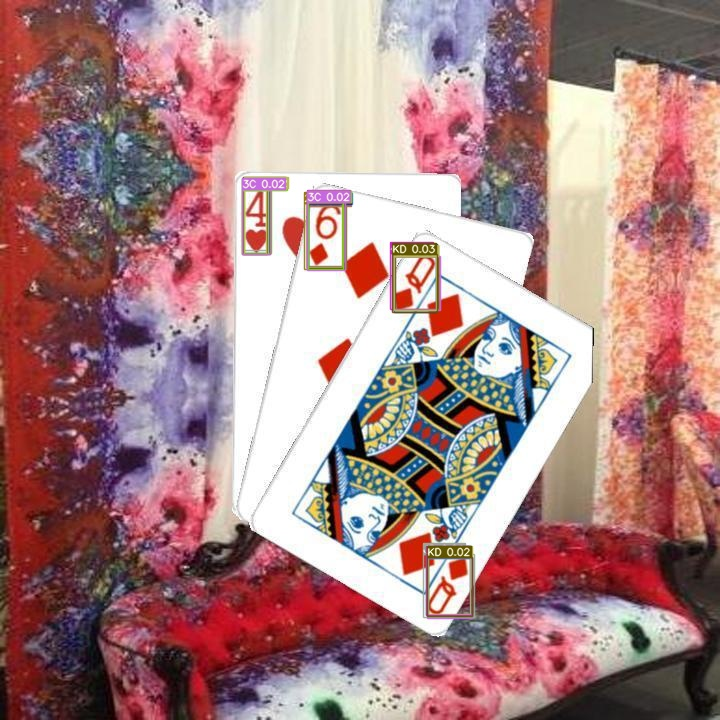

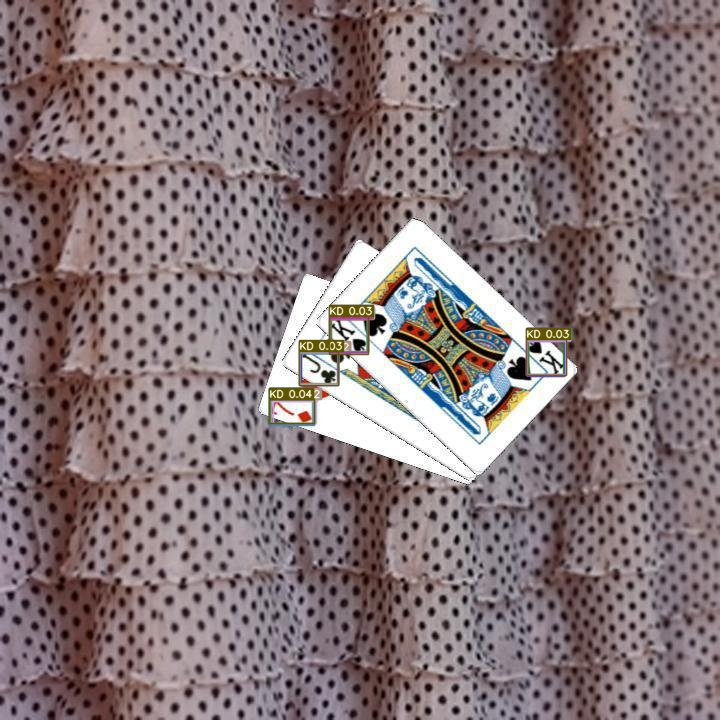

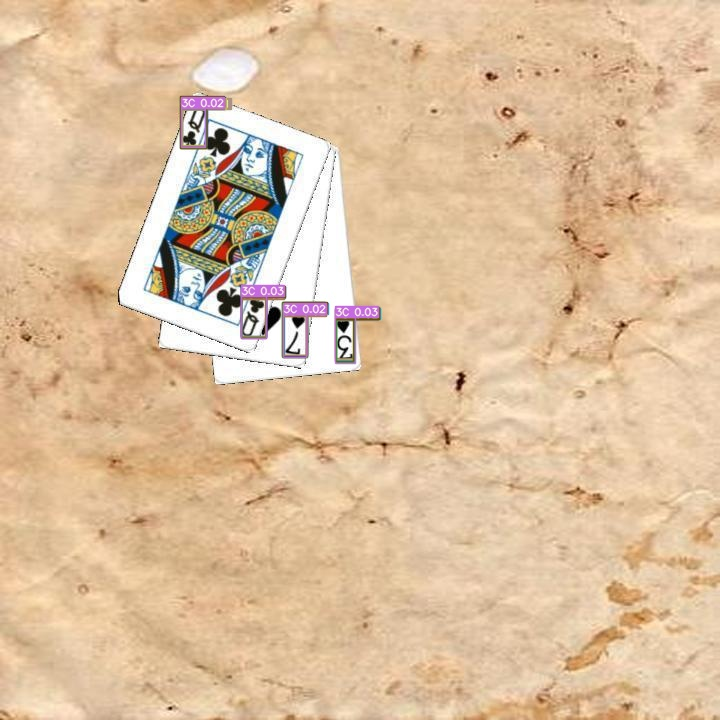

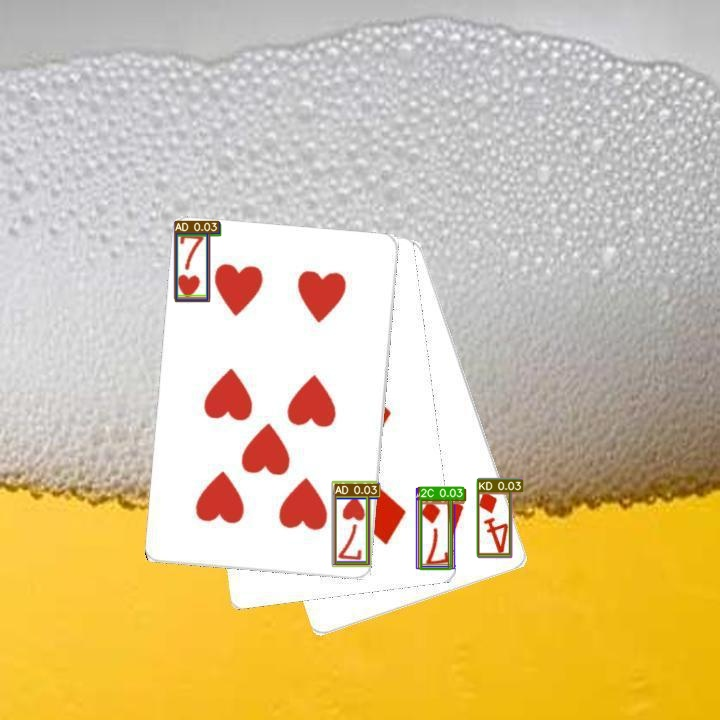

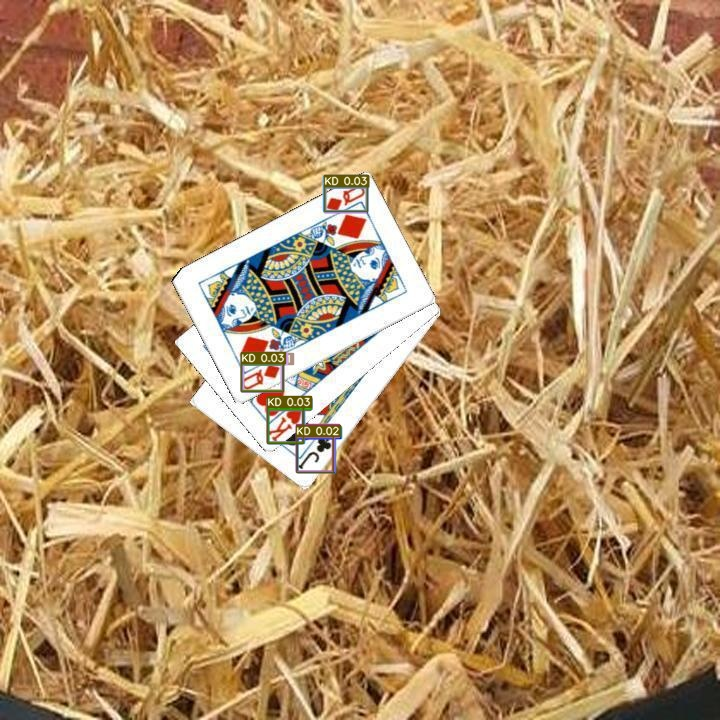

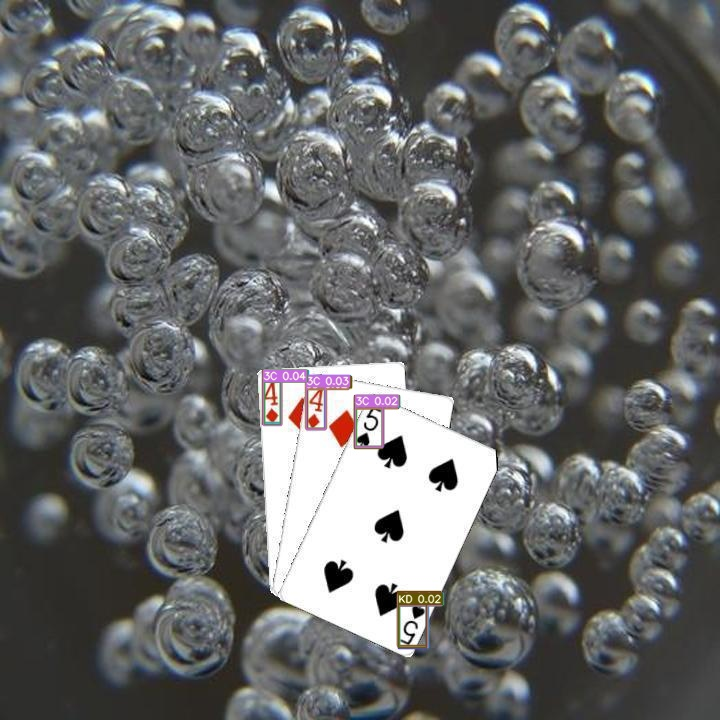

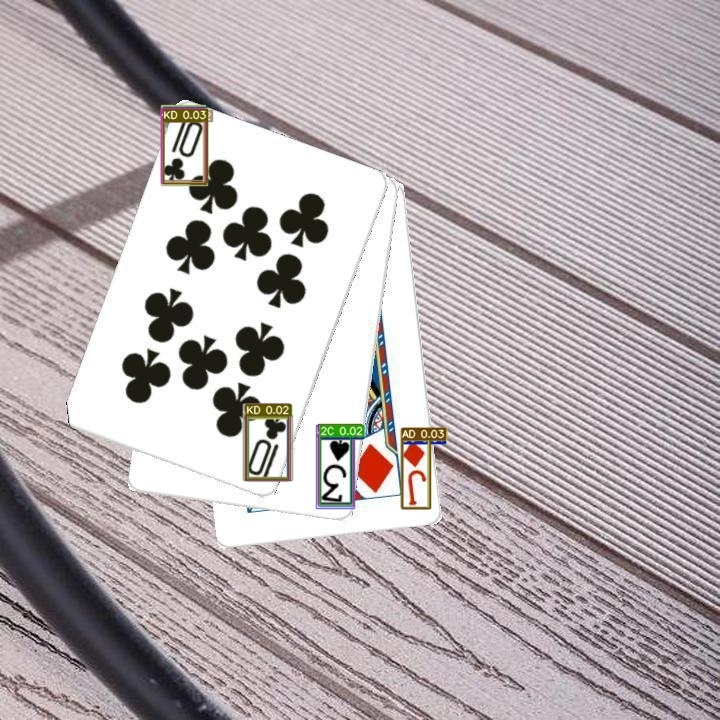

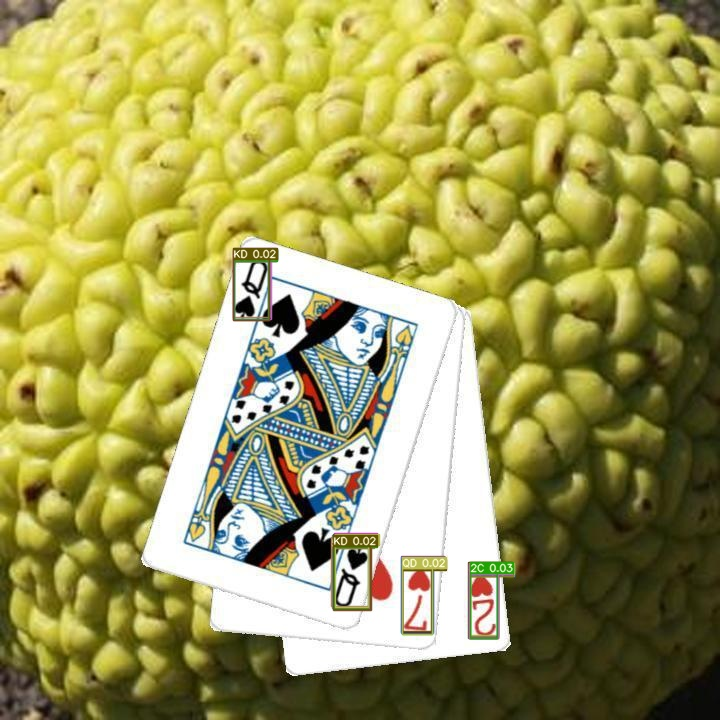

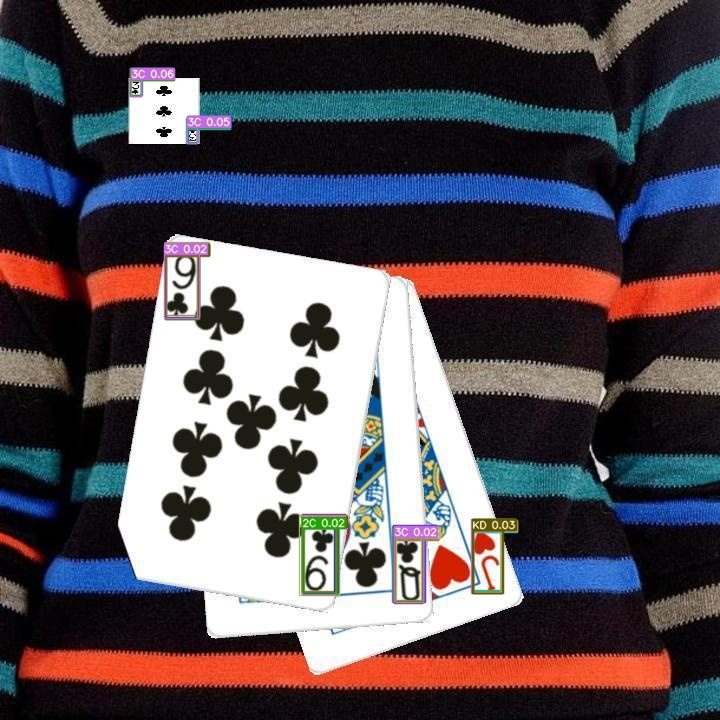

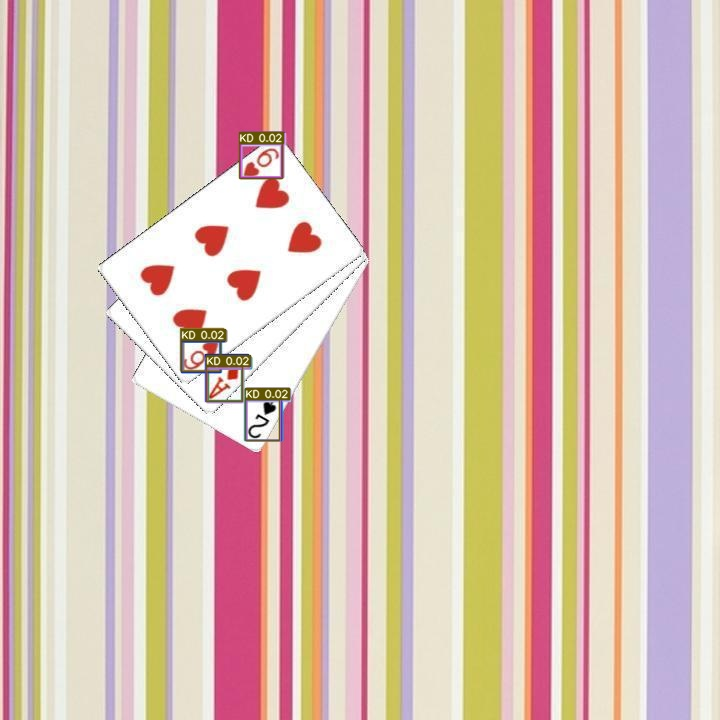

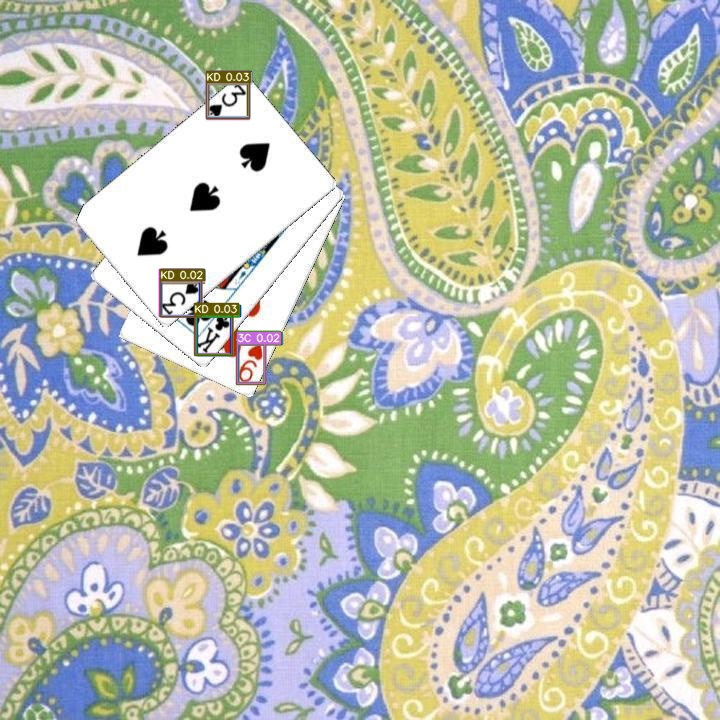

In [ ]:
#display inference on ALL valid images
import glob
i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/yolov7/runs/detect/exp_300_0.01/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
      i = i + 1

# **Explanation of the First trial**

The training is performed by using the pretrained model which is the YOLOV7 full architecture with **16** batch size, the default optimizer is used which is the **SGD**, the custom hyperparameters is used for **300** epochs.

The losses of the training and validation are decreased;so,this is an indication that the model is learning. But the highest accuracy which is shown in **MAP@0.5** is **14%** which is a bad accuarcy for object detection. This is due to the small dataset used. Consequently, the performance of the detection is very low. In order to detect the classes, the confidence is set to **0.01** which is a low confidence.

This trail is very poor to detect the objects as the number of classes is very large compared to the number of images fed to the architceture to be learned. So, a lot of data is not learned well. Hence, a new trail is performed by making some tuning to the hyperparmeters to make some data augmentation to increase the number of the dataset.



# **Dataset with 1000 images and Data Augmentation**


# Explanation about the new trial with large dataset

Due to the lack of dataset and the number of classes is large so each class need to have sufficient number of dataset to make the model trained properly to detect all the classes. Hence, the number of dataset is increased to be **1000** images where **800** for training and **200** for validation. Some data augemntation is implemented as multi-scale for the images, make some rotations, and flipping the images; so the model would have varities of image to be trained well.

The training in this trial was about **300** epochs for **8** batch size and change the default optimizer from **SGD** to **adam**.

In [ ]:
%cd /content/drive/MyDrive/yolov7_1000/
!python train.py --workers 1 --device 0 --batch-size 8 --epochs 300 --img 640 640 --data /content/drive/MyDrive/yolov7_1000/data/cards_1000.yaml --cfg /content/drive/MyDrive/yolov7_1000/cfg/training/yolov7.yaml --hyp data/hyp.scratch.custom.yaml --weights yolov7.pt --adam --multi-scale --name 'epoch_300_newhyp'

[Errno 2] No such file or directory: 'drive/MyDrive/yolov7_1000/'
/content/drive/MyDrive/yolov7
YOLOR 🚀 2022-10-7 torch 1.11.0+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=True, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=False, cfg='/content/drive/MyDrive/yolov7_1000/cfg/training/yolov7.yaml', data='/content/drive/MyDrive/yolov7_1000/data/cards_1000.yaml', device='0', entity=None, epochs=300, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.custom.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=True, name='epoch_300_newhyp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/epoch_300_newhyp3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, v5_metric=False, weights='yolov7.pt', workers=1, world_size=1)
tensorboard: Start with 

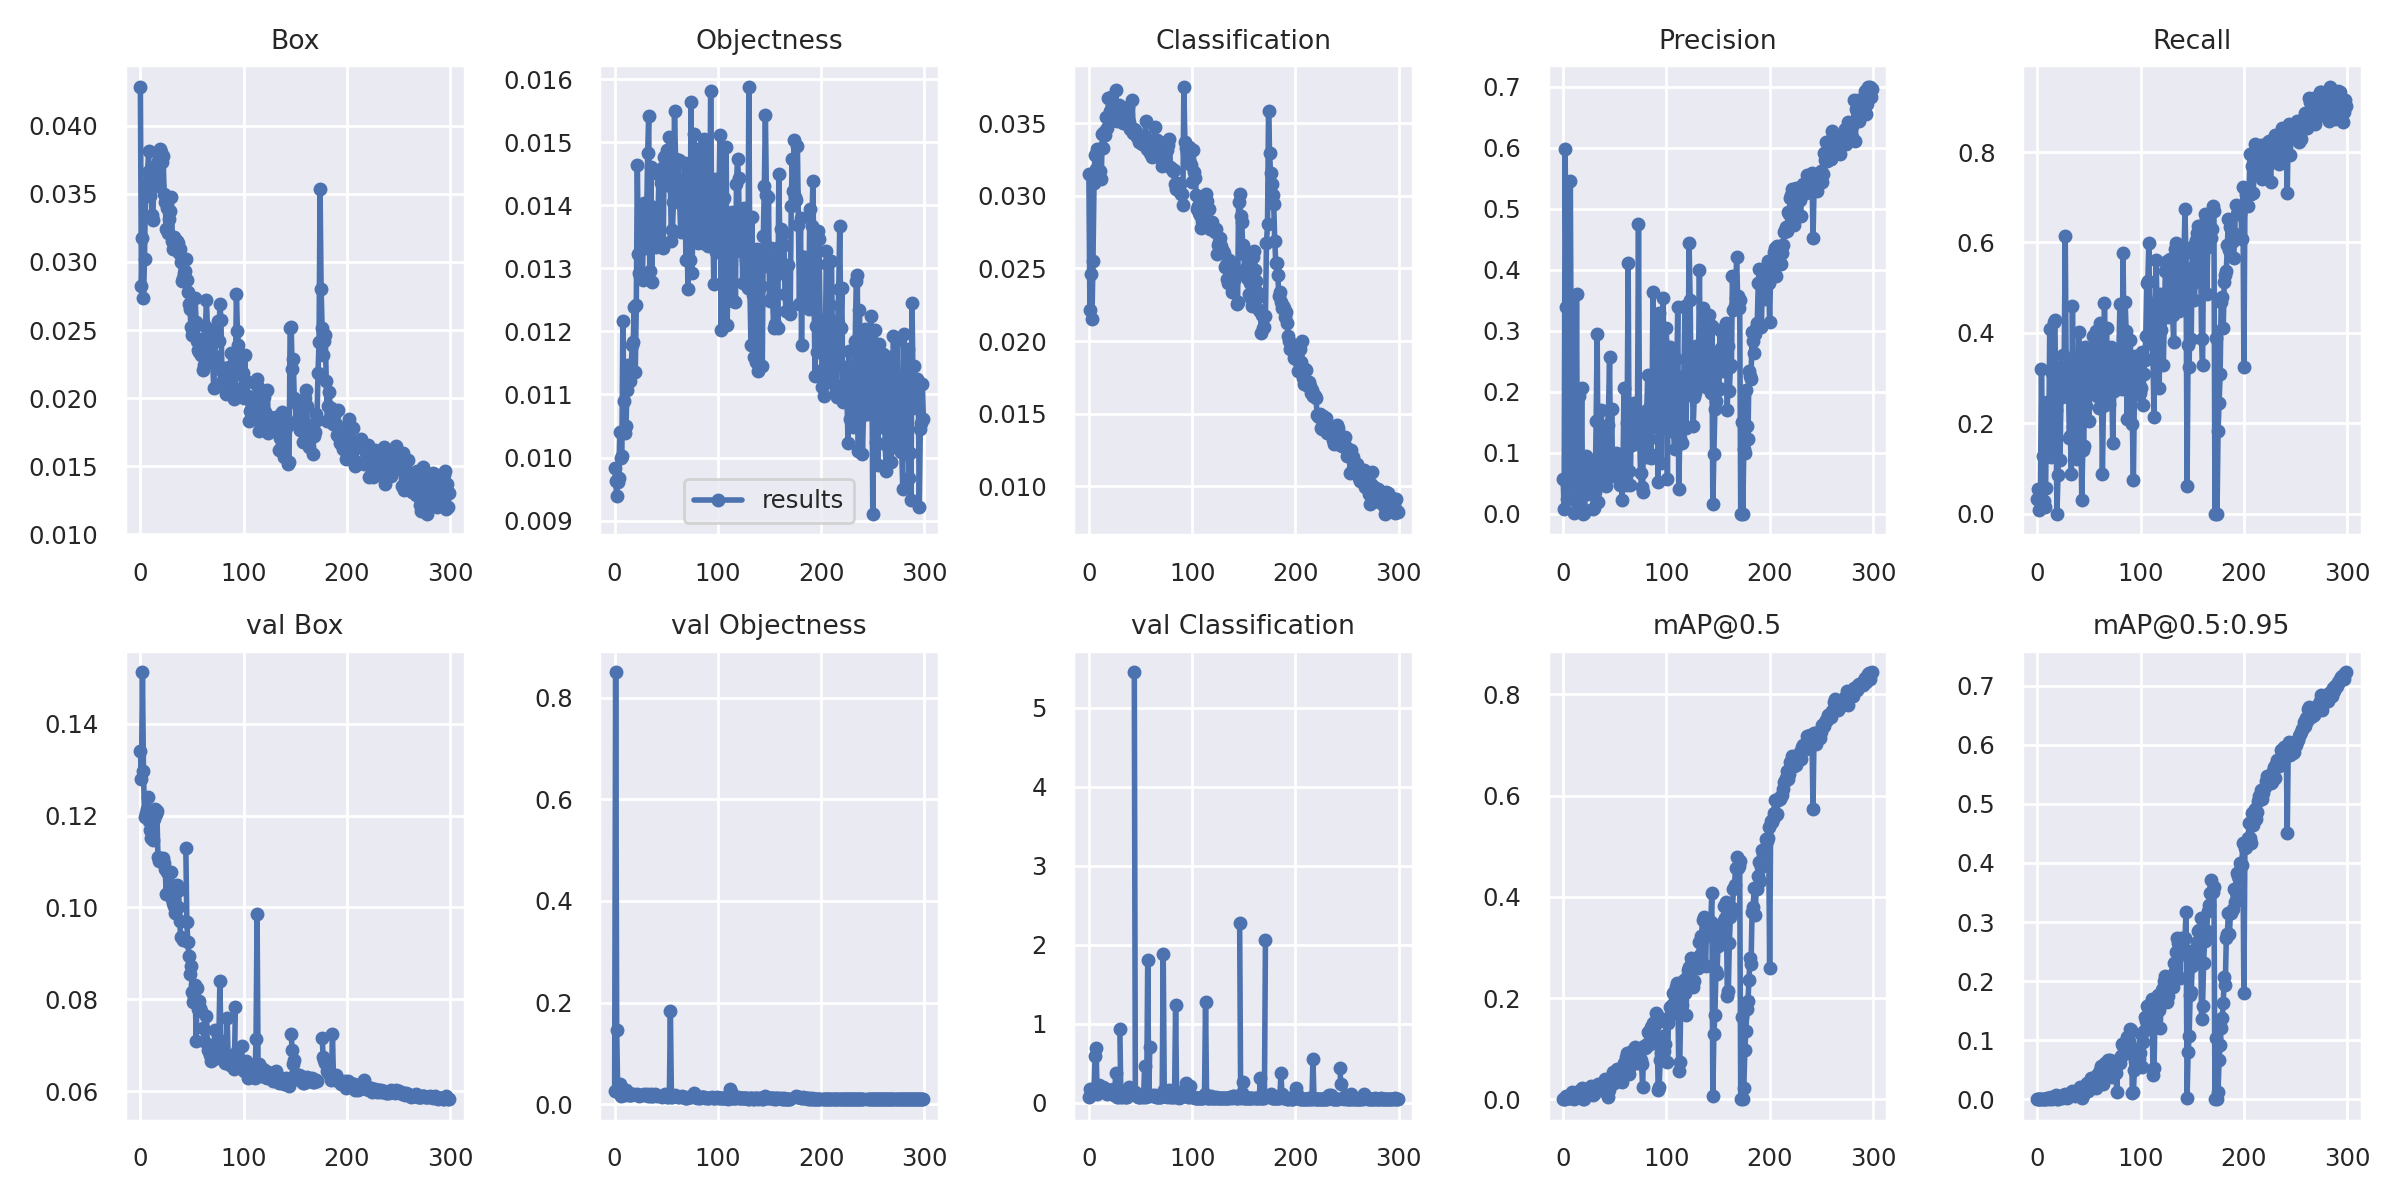

In [ ]:
Image(filename='/content/drive/MyDrive/yolov7_1000/runs/train/epoch_300_newhyp/results.png', width=1000)

As shown from the results that the losses is decreased and the **MAP@0.5** is increased to be **80%** which is a high accuarcy relative to the last trial and also according to the number of images fed to the network.

# Detection Phase

In [ ]:
%cd /content/drive/MyDrive/yolov7_1000/
# Run evaluation
!python detect.py --weights runs/train/epoch_300_newhyp/weights/best.pt --conf 0.5 --img-size 640 --source /content/drive/MyDrive/yolov7_1000/data/valid_200/images --name 'exp_300_0.5new_hyp'

/content/drive/MyDrive/yolov7_1000
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp_300_0.5new_hyp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/drive/MyDrive/yolov7_1000/data/valid_200/images', update=False, view_img=False, weights=['runs/train/epoch_300_newhyp/weights/best.pt'])
YOLOR 🚀 2022-10-7 torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
Model Summary: 314 layers, 36756866 parameters, 6194944 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894

# Detecting images with confidence **0.3**

In [ ]:
#display inference on aLL valid images
import glob
i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/yolov7_1000/runs/detect/exp_300_0.3new_hyp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
      i = i + 1

# Detecting images with confidence **0.5**

In [ ]:
#display inference on ALL valid images
import glob
i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/drive/MyDrive/yolov7_1000/runs/detect/exp_300_0.5new_hyp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
      i = i + 1

As shown from the detection results that the model had the ability to detect the classes with confidence **0.3** which is increased compared to the previouse trial where the confidence was **0.01** to be capable to detect. With **0.3** confidence all the images are detected correctly. With the increase in the dataset a lot of images have a confidence score bigger than **0.7**.

So, another detection is made by confidence **0.5** and most of the images are detected as shown in the results before.

# **Recommendation**

In order to get high detection with YOLOV7, the more the dataset fed to the architecture, the better is the detection so that was done in this task.